In [1]:
import numpy as np

# adapted from https://stackoverflow.com/questions/2448015/2d-convolution-using-python-and-numpy

def convolution2d(image, kernel, stride, bias):
  k, n = kernel.shape
  assert k == n
  y, x = image.shape
  y = (y - k) // stride + 1
  x = (x - k) // stride + 1
  new_image = np.zeros((y,x))
  for i in range(y):
    for j in range(x):
      new_image[i][j] = (np.sum(image[i:i+k, j:j+k]*kernel) + bias)
  return new_image

In [2]:
input = np.array([[17, 24,  1,  8, 15],
                  [23,  5,  7, 14, 16],
                  [4,  6, 13, 20, 22],
                  [10, 12, 19, 21,  3],
                  [11, 18, 25,  2,  9]])

kernel = np.array([[8, 1, 6],
                   [3, 5, 7],
                   [4, 9, 2]])

stride = 1

bias = np.array([0])

output = convolution2d(input, kernel, stride, bias)

print('input:\n', input)
print('input shape:', input.shape)
print('kernel shape:', kernel.shape)
print('output shape:', output.shape)
print('output:\n', output)

input:
 [[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]
input shape: (5, 5)
kernel shape: (3, 3)
output shape: (3, 3)
output:
 [[405. 570. 585.]
 [550. 615. 730.]
 [595. 760. 575.]]


/tmp/ipykernel_37633/3404331207.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_image[i][j] = (np.sum(image[i:i+k, j:j+k]*kernel) + bias)


In [3]:
import torch
import torch.nn as nn

conv_layer = nn.Conv2d(in_channels = 1, out_channels=1, kernel_size = 3, stride=1, padding = 0)

arr = np.array([[8, 1, 6],
                [3, 5, 7],
                [4, 9, 2]])

kernel = torch.tensor(arr, dtype = torch.float32)
nb_channels = 1
kernel = kernel.view(1, 1, 3, 3).repeat(1, nb_channels, 1, 1)

conv_layer.weight.data = kernel
conv_layer.bias.data = torch.tensor([0], dtype = torch.float32)

tensor_input = torch.tensor(input, dtype = torch.float32)
tensor_input = tensor_input.unsqueeze(0)
tensor_input = tensor_input.unsqueeze(0)
tensor_output = conv_layer(tensor_input)

print('input:\n', tensor_input)
print('kernel shape:', kernel.shape)
print('input shape:', tensor_input.shape)
print('output shape:', tensor_output.shape)
print('output:\n', tensor_output)

input:
 tensor([[[[17., 24.,  1.,  8., 15.],
          [23.,  5.,  7., 14., 16.],
          [ 4.,  6., 13., 20., 22.],
          [10., 12., 19., 21.,  3.],
          [11., 18., 25.,  2.,  9.]]]])
kernel shape: torch.Size([1, 1, 3, 3])
input shape: torch.Size([1, 1, 5, 5])
output shape: torch.Size([1, 1, 3, 3])
output:
 tensor([[[[405., 570., 585.],
          [550., 615., 730.],
          [595., 760., 575.]]]], grad_fn=<ConvolutionBackward0>)


In [4]:
# pip install scikit-image

In [5]:
from skimage.io import imread
from skimage.filters import prewitt_h,prewitt_v,prewitt

#read the image 
url = '../../img/mocked_face.png'
image = imread(url, as_gray=True)

# detect vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

# detect horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

# detect horizontal and vertical edges using prewitt kernel
edges_prewitt = prewitt(image)

/home/ebezerra/anaconda3/envs/ailab311/lib/python3.11/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Text(0.5, 1.0, 'Prewitt Edge Detection (V+H)')

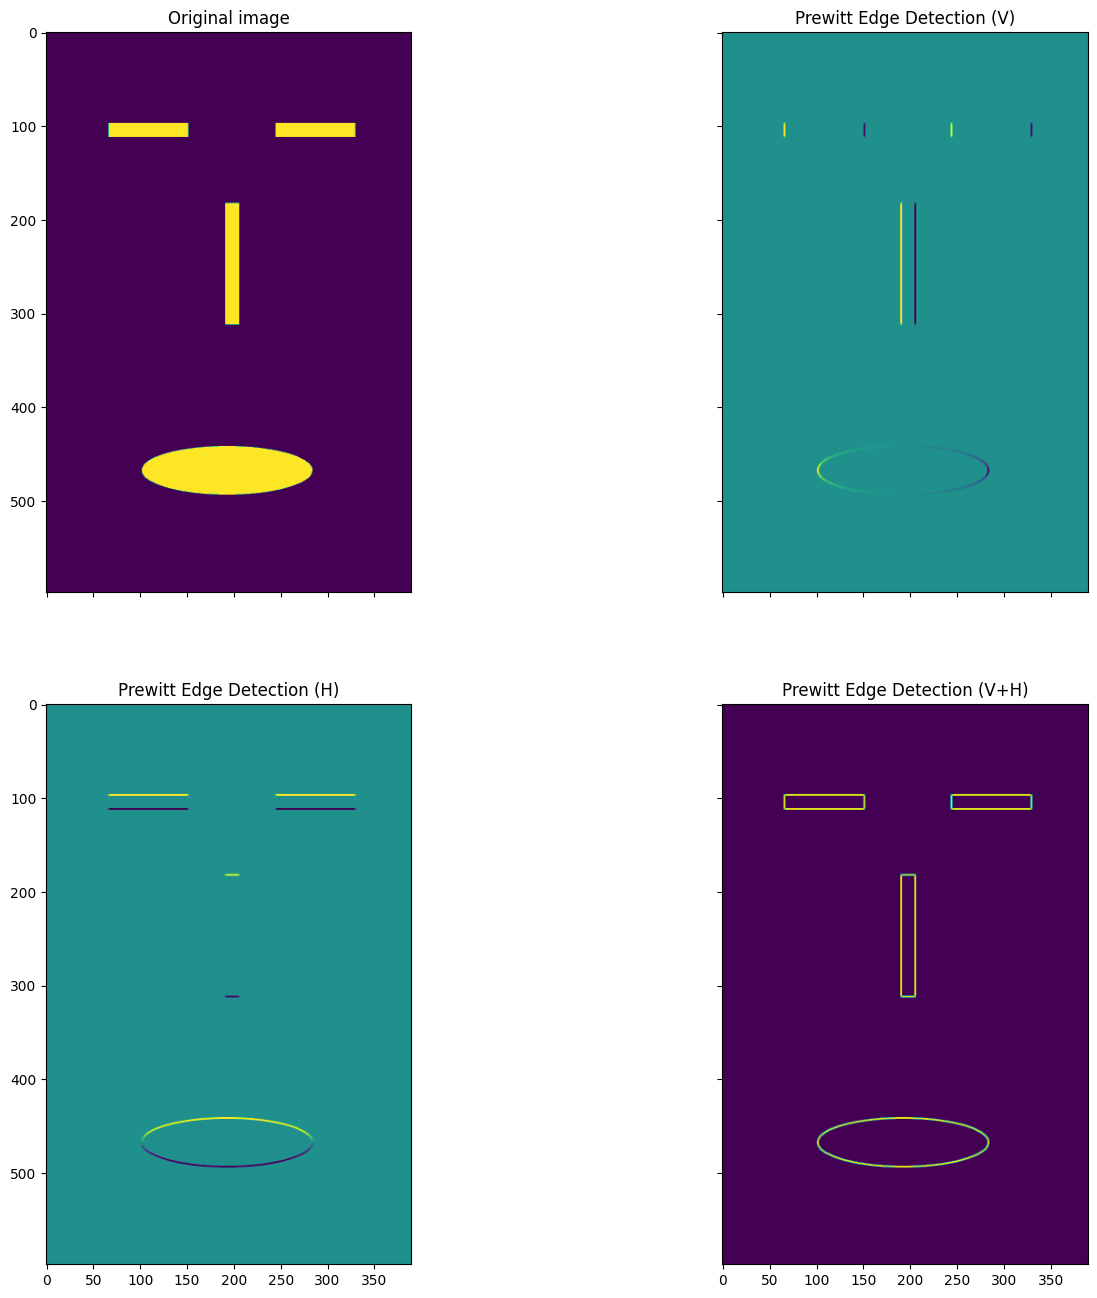

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(16, 16))
axes = axes.ravel()

axes[0].imshow(image)
axes[0].set_title('Original image')

axes[1].imshow(edges_prewitt_vertical)
axes[1].set_title('Prewitt Edge Detection (V)')

axes[2].imshow(edges_prewitt_horizontal)
axes[2].set_title('Prewitt Edge Detection (H)')

axes[3].imshow(edges_prewitt)
axes[3].set_title('Prewitt Edge Detection (V+H)')

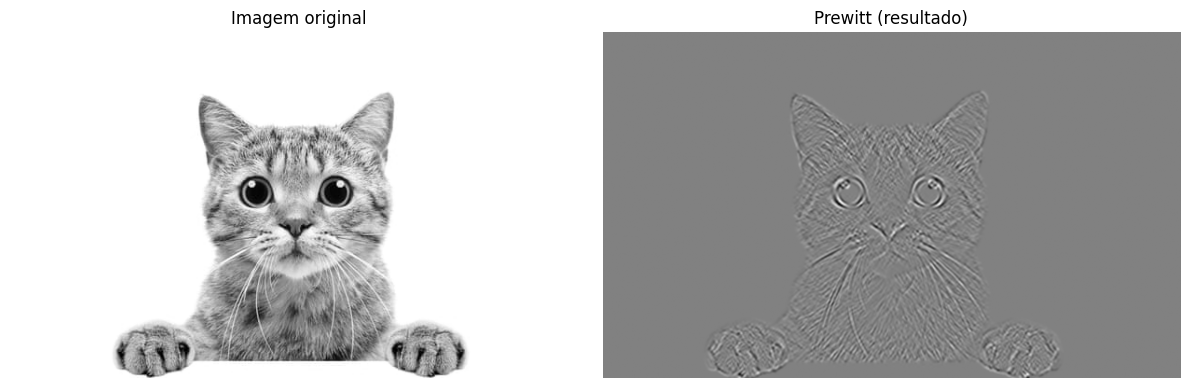

In [7]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h, prewitt_v, prewitt
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image
url = "../../img/cute_cat.jpeg"
image = imread(url, as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(edges_prewitt_horizontal)

# mostrar original e resultado lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagem original')
axes[0].axis('off')

axes[1].imshow(edges_prewitt_vertical, cmap='gray')
axes[1].set_title('Prewitt (resultado)')
axes[1].axis('off')

plt.tight_layout()
plt.show()
